<a href="https://colab.research.google.com/github/SatyajitSen/Abstractive-Summarization/blob/master/abstractive_headline_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path_to_file = '/content/drive/My Drive/Text Summarization/Dataset/data/dataset.txt'

In [3]:
import json
with open(path_to_file) as file:
    dictionary = json.loads(file.read())

data = dictionary['articles']

titles, bodies, categories= [], [], []
for item in data:
  title = item["title"].strip()
  body = item["body"].strip()
  label = item["label"].strip()
  titles.append(title), bodies.append(body), categories.append(label)

categories[0], titles[0], bodies[0]

('international',
 'শান্তি চেয়ে ট্রাম্প বেথলেহেমে',
 'জঙ্গি হটাতে যুদ্ধের ডাক দিয়েছিলেন আগেই। এ বার পশ্চিম এশিয়ায় শান্তি স্থাপনের জন্য যত দূর সম্ভব চেষ্টা করবেন বলে আশ্বাস দিলেন মার্কিন প্রেসিডেন্ট ডোনাল্ড ট্রাম্প। গত তিন বছরে একটি বারের জন্যও এক টেবিলে বসেনি ইজরায়েল-প্যালেস্তাইন। সন্ধি নিয়ে একটাও কথা হয়নি যুযুধান দুই দেশে। ট্রাম্প তবু শান্তি ফেরাতেই জেরুজালেম থেকে আজ সরাসরি পা রাখলেন বেথলেহেমে। বিষয়টা যে কঠিন, তা মেনে নিয়েই। গত কাল এ নিয়ে ইজরায়েলি প্রধানমন্ত্রী বেঞ্জামিন নেতানিয়াহুর সঙ্গে এক প্রস্ত কথা হয় তাঁর। নেতানিয়াহুর তরফে সাড়া মিলতেই উৎসাহী ট্রাম্প আজ পৌঁছে যান ইজরায়েল অধিকৃত ওয়েস্ট ব্যাঙ্কে। গাড়িতে পাক্কা কুড়ি মিনিটের রাস্তা। মাঝখানে পেরিয়ে আসেন দু’দেশের মাঝের বহু বিতর্কিত ‘বিচ্ছেদের দেওয়াল’। মার্কিন প্রেসিডেন্টের এই সফর ঘিরে প্যালেস্তাইনিদের একাংশ বিক্ষোভ শুরু করেছেন গাজা আর ওয়েস্ট ব্যাঙ্কে। তবু বেথলেহেমে ট্রাম্পের গাড়ি ঢুকতেই চোখে পড়ল পোস্টার— ‘‘শান্তির দূতকে স্বাগত জানাচ্ছে শান্তির শহর।’’ তা হলে কি প্যালেস্তাইনও রাজি? সরাসরি কেউ মুখ না খুললেও, তেমনটাই মনে করছেন কূটনীতিক

In [0]:
import pandas as pd

reviews = pd.DataFrame({'Titles': titles, "Texts": bodies})

In [5]:
reviews.head()

Titles                                              Texts
0                      শান্তি চেয়ে ট্রাম্প বেথলেহেমে  জঙ্গি হটাতে যুদ্ধের ডাক দিয়েছিলেন আগেই। এ বার ...
1                      ফের ক্যাম্প চালু বেড়াবেড়িতে  শাসকদলের গোষ্ঠীকোন্দলের জেরে সোমবার চাষিদের নথ...
2         পছন্দসই মিশ্র পাঠে হাজিরায় ফাঁকি নয়: পার্থ  শিক্ষার সর্বস্তরে শিক্ষক-শিক্ষিকাদের হাজিরায় ব...
3  হোয়াট‌্সঅ্যাপ গ্রুপ ছেড়ে দারুণ বার্তা দিলেন  ...  এখন সোশ্যাল মিডিয়া ছাড়া ভাবাই যায় না। কোনও ঘট...
4                  রোজভ্যালির আরও দুই কর্তা গ্রেফতার  তদন্তের গতিপ্রকৃতি নিয়ে আদালতে প্রশ্ন ওঠার পর ...

In [6]:
cd /content/drive/My Drive/ah

/content/drive/My Drive/ah


In [7]:
#this code is for Amazon fine food review. Here we are trying to make a text summarizer.
'''Cell 1:'''
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.python.layers.core import Dense
from tensorflow.python.ops.rnn_cell_impl import _zero_state_tensors
import re
from nltk.corpus import stopwords
import time
print('TensorFlow Version: {}'.format(tf.__version__))
import csv

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:455: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:456: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:457: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or 

TensorFlow Version: 1.1.0


In [8]:
reviews.isnull().sum()

Titles    0
Texts     0
dtype: int64

In [9]:
reviews.shape

(1565, 2)

In [10]:
reviews.isnull().sum()

Titles    0
Texts     0
dtype: int64

In [11]:
reviews.shape

(1565, 2)

In [12]:
#print(reviews.Summary.value_counts(" "))
#print(reviews.Summary.value_counts())
print()
print(reviews.Titles.describe())
print()
print(reviews.Texts.describe())


count          1565
unique         1553
top       টুকরো খবর
freq             11
Name: Titles, dtype: object

count     1565
unique    1561
top           
freq         3
Name: Texts, dtype: object


In [0]:
'''#Cell 8:'''

stop_words = pd.read_csv('/content/drive/My Drive/ah/stop_words/stop_words_list_full.txt', sep = '\t', names = ['sw'])
stop_words = list(stop_words['sw'])

bangla_fullstop = u"\u0964"
punctSeq = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
quote = r"[\\]"
punc = u"[_@(),$%^&*+={}\[\]:\"|\'\~`<>/,¦!?½£¶¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"

def clean_text(text, remove_stopwords):
    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''
    
    # Format words and remove unwanted characters
    text = re.sub(punctSeq, " ", text).strip()
    text = re.sub(quote, " ", text)
    text = re.sub(bangla_fullstop, " ",text)
    text = re.sub(punc, " ", text)
 
    # Optionally, remove stop words
    if remove_stopwords:
        text = text.split()
        text = [w for w in text if not w in stop_words]
        text = " ".join(text)

    return text

In [14]:
'''#Cell 9:'''
clean_summaries = []
for title in reviews.Titles:
    clean_summaries.append(clean_text(str(title), remove_stopwords=False))
print("Summaries are complete.")

clean_texts = []
for text in reviews.Texts:
    clean_texts.append(clean_text(str(text), remove_stopwords=True))
print("Texts are complete.")

Summaries are complete.
Texts are complete.


In [15]:
for i in range(0,5):
    print("Text: ", clean_texts[i])
    print("Summaries: ",clean_summaries[i])
    print()


Text:  জঙ্গি হটাতে যুদ্ধের ডাক দিয়েছিলেন পশ্চিম এশিয়ায় শান্তি স্থাপনের দূর সম্ভব আশ্বাস মার্কিন প্রেসিডেন্ট ডোনাল্ড ট্রাম্প তিন বছরে বারের জন্যও টেবিলে বসেনি ইজরায়েল প্যালেস্তাইন সন্ধি একটাও হয়নি যুযুধান দেশে ট্রাম্প শান্তি ফেরাতেই জেরুজালেম সরাসরি পা রাখলেন বেথলেহেমে বিষয়টা কঠিন মেনে নিয়েই কাল ইজরায়েলি প্রধানমন্ত্রী বেঞ্জামিন নেতানিয়াহুর প্রস্ত নেতানিয়াহুর তরফে সাড়া মিলতেই উৎসাহী ট্রাম্প পৌঁছে ইজরায়েল অধিকৃত ওয়েস্ট ব্যাঙ্কে গাড়িতে পাক্কা কুড়ি মিনিটের রাস্তা মাঝখানে পেরিয়ে আসেন দেশের মাঝের বিতর্কিত বিচ্ছেদের দেওয়াল মার্কিন প্রেসিডেন্টের সফর ঘিরে প্যালেস্তাইনিদের একাংশ বিক্ষোভ গাজা ওয়েস্ট ব্যাঙ্কে বেথলেহেমে ট্রাম্পের গাড়ি ঢুকতেই চোখে পড়ল পোস্টার— শান্তির দূতকে স্বাগত জানাচ্ছে শান্তির শহর প্যালেস্তাইনও রাজি সরাসরি মুখ খুললেও তেমনটাই কূটনীতিকরা সাংবাদিকদের প্রশ্নের উত্তরে ট্রাম্পের সফরসঙ্গী মার্কিন বিদেশসচিব রেক্স টিলারসনও জানালেন মধ্যস্থতাকারী আমেরিকাতে টেবিলে রেখেই আলোচনায় বসতে দেশ বেথলেহেমে ট্রাম্প প্যালেস্তাইনি রাষ্ট্রপ্রধান মাহমুদ আব্বাসের মার্কিন প্রেসিডেন্টের সফরের উদ্দেশ্যকে 

In [16]:
'''#Cell 10:'''
def count_words(count_dict, text):
    '''Count the number of occurrences of each word in a set of text'''
    for sentence in text:
        for word in sentence.split():
            if word not in count_dict:
                count_dict[word] = 1
            else:
                count_dict[word] += 1
                
'''#Cell 11: Find the number of times each word was used and the size of the vocabulary'''
word_counts = {}

count_words(word_counts, clean_summaries)
count_words(word_counts, clean_texts)
            
print("Size of Vocabulary:", len(word_counts))

Size of Vocabulary: 45422


In [17]:
'''#Cell 12:'''
# Commented out because it won't load on Kaggle, so I'll replace it an empty list
embeddings_index = []

# Load Conceptnet Numberbatch's (CN) embeddings, similar to GloVe, but probably better 
# (https://github.com/commonsense/conceptnet-numberbatch)
embeddings_index = {}

with open('/content/drive/My Drive/Text Summarization/Dataset/data/ben_news.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split(' ')
        word = values[0]
        embedding = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = embedding

print('Word embeddings:', len(embeddings_index))

Word embeddings: 123390


In [18]:
embeddings_index

{'123389': array([300.], dtype=float32),
 'ও': array([-1.3472505 , -1.5632831 , -1.3628168 , -0.38938737,  0.68028563,
        -0.7653805 , -0.08649348,  0.397799  ,  1.5300579 , -1.3306549 ,
         1.453645  ,  0.5608422 ,  0.5769044 ,  1.3620572 ,  4.081266  ,
        -0.60976297,  0.45078307,  0.20667891,  2.0014877 , -1.6970735 ,
         2.340431  , -0.8039562 ,  0.7727713 ,  0.7420482 , -3.9267595 ,
         3.196623  , -0.28252533, -0.6118724 , -0.6239042 , -1.2510449 ,
        -4.9193153 ,  0.18058997,  1.637855  , -1.3154066 , -0.38358325,
         0.61165714, -2.2149093 ,  0.8416139 ,  0.07198516,  0.62183243,
         1.3835849 ,  1.6411777 , -1.7772539 ,  0.29368803,  1.8563087 ,
        -3.3861604 ,  0.8942382 , -2.8259857 , -4.2678847 ,  1.1089805 ,
        -0.67025423,  2.683131  ,  1.6709641 , -2.9803185 , -2.5323942 ,
        -2.4288237 , -2.6801684 ,  1.1101255 ,  2.4480486 ,  0.8115277 ,
        -0.9209662 , -2.0922298 , -1.0065572 ,  2.793609  ,  0.41527802,
     

In [19]:
'''#Cell 13: Find the number of words that are missing from CN, and are used more than our threshold.'''
missing_words = 0
threshold = 20

for word, count in word_counts.items():
    if count > threshold:
        if word not in embeddings_index:
            missing_words += 1
            
missing_ratio = round(missing_words/len(word_counts),4)*100
            
print("Number of words missing from CN:", missing_words)
print("Percent of words that are missing from vocabulary: {}%".format(missing_ratio))

Number of words missing from CN: 0
Percent of words that are missing from vocabulary: 0.0%


In [20]:
'''#Cell 14: Limit the vocab that we will use to words that appear ≥ threshold or are in GloVe'''

#dictionary to convert words to integers
vocab_to_int = {} 

value = 0
for word, count in word_counts.items():
    if count >= threshold or word in embeddings_index:
        vocab_to_int[word] = value
        value += 1

# Special tokens that will be added to our vocab
codes = ["<UNK>","<PAD>","<EOS>","<GO>"]   

# Add codes to vocab
for code in codes:
    vocab_to_int[code] = len(vocab_to_int)

# Dictionary to convert integers to words
int_to_vocab = {}
for word, value in vocab_to_int.items():
    int_to_vocab[value] = word

usage_ratio = round(len(vocab_to_int) / len(word_counts),4)*100

print("Total number of unique words:", len(word_counts))
print("Number of words we will use:", len(vocab_to_int))
print("Percent of words we will use: {}%".format(usage_ratio))

Total number of unique words: 45422
Number of words we will use: 45007
Percent of words we will use: 99.09%


In [21]:
'''#Cell 15:'''
# Need to use 300 for embedding dimensions to match CN's vectors.
embedding_dim = 300
nb_words = len(vocab_to_int)

# Create matrix with default values of zero
word_embedding_matrix = np.zeros((nb_words, embedding_dim), dtype=np.float32)
for word, i in vocab_to_int.items():
    if word in embeddings_index:
        word_embedding_matrix[i] = embeddings_index[word]
    else:
        # If word not in CN, create a random embedding for it
        new_embedding = np.array(np.random.uniform(-1.0, 1.0, embedding_dim))
        #embeddings_index[word] = new_embedding
        word_embedding_matrix[i] = new_embedding

# Check if value matches len(vocab_to_int)
print(len(word_embedding_matrix))

45007


In [0]:
'''#Cell 16:'''
def convert_to_ints(text, word_count, unk_count, eos=False):
    '''Convert words in text to an integer.
       If word is not in vocab_to_int, use UNK's integer.
       Total the number of words and UNKs.
       Add EOS token to the end of texts'''
    ints = []
    for sentence in text:
        sentence_ints = []
        for word in sentence.split():
            word_count += 1
            if word in vocab_to_int:
                sentence_ints.append(vocab_to_int[word])
            else:
                sentence_ints.append(vocab_to_int["<UNK>"])
                unk_count += 1
        if eos:
            sentence_ints.append(vocab_to_int["<EOS>"])
        ints.append(sentence_ints)
    return ints, word_count, unk_count

In [23]:
'''#Cell 17:'''
# Apply convert_to_ints to clean_summaries and clean_texts
word_count = 0
unk_count = 0

int_summaries, word_count, unk_count = convert_to_ints(clean_summaries, word_count, unk_count)
int_texts, word_count, unk_count = convert_to_ints(clean_texts, word_count, unk_count, eos=True)

unk_percent = round(unk_count/word_count,4)*100

print("Total number of words in headlines:", word_count)
print("Total number of UNKs in headlines:", unk_count)
print("Percent of words that are UNK: {}%".format(unk_percent))

Total number of words in headlines: 323419
Total number of UNKs in headlines: 445
Percent of words that are UNK: 0.13999999999999999%


In [0]:
'''#Cell 18:'''

def create_lengths(text):
    '''Create a data frame of the sentence lengths from a text'''
    lengths = []
    for sentence in text:
        lengths.append(len(sentence))
    return pd.DataFrame(lengths, columns=['counts'])

In [25]:
'''#Cell 19:'''

lengths_summaries = create_lengths(int_summaries)
lengths_texts = create_lengths(int_texts)

print("Summaries:")
print(lengths_summaries.describe())
print()
print("Texts:")
print(lengths_texts.describe())

Summaries:
            counts
count  1565.000000
mean      6.647284
std       2.186231
min       1.000000
25%       5.000000
50%       6.000000
75%       8.000000
max      13.000000

Texts:
            counts
count  1565.000000
mean    201.010224
std     114.906177
min       1.000000
25%     122.000000
50%     186.000000
75%     255.000000
max    1058.000000


'''Cell 21:'''
#Inspect the length of summaries
print(np.percentile(lengths_summaries.counts, 90))
print(np.percentile(lengths_summaries.counts, 95))
print(np.percentile(lengths_summaries.counts, 99))

In [0]:
'''Cell 22:'''
def unk_counter(sentence):
    '''Counts the number of time UNK appears in a sentence.'''
    unk_count = 0
    for word in sentence:
        if word == vocab_to_int["<UNK>"]:
            unk_count += 1
    return unk_count

In [27]:
'''Cell 23:'''
# Sort the summaries and texts by the length of the texts, shortest to longest
# Limit the length of summaries and texts based on the min and max ranges.
# Remove reviews that include too many UNKs

sorted_summaries = []
sorted_texts = []
max_text_length = 199 #84
max_summary_length = 20
min_length = 2
unk_text_limit = 100 # use 1
unk_summary_limit = 100 # use 0

for length in range(min(lengths_texts.counts), max_text_length): 
    for count, words in enumerate(int_summaries):
        if (len(int_summaries[count]) >= min_length and
            len(int_summaries[count]) <= max_summary_length and
            len(int_texts[count]) >= min_length and
            unk_counter(int_summaries[count]) <= unk_summary_limit and
            unk_counter(int_texts[count]) <= unk_text_limit and
            length == len(int_texts[count])
           ):
            sorted_summaries.append(int_summaries[count])
            sorted_texts.append(int_texts[count])
        
# Compare lengths to ensure they match
print(len(sorted_summaries))
print(len(sorted_texts))

866
866




```
[# This is formatted as code](https://)
```

Building the model

In [0]:
'''Cell 24:'''
def model_inputs():
    '''Create palceholders for inputs to the model'''
    
    input_data = tf.placeholder(tf.int32, [None, None], name='input')
    targets = tf.placeholder(tf.int32, [None, None], name='targets')
    lr = tf.placeholder(tf.float32, name='learning_rate')
    keep_prob = tf.placeholder(tf.float32, name='keep_prob')
    summary_length = tf.placeholder(tf.int32, (None,), name='summary_length')
    max_summary_length = tf.reduce_max(summary_length, name='max_dec_len')
    text_length = tf.placeholder(tf.int32, (None,), name='text_length')

    return input_data, targets, lr, keep_prob, summary_length, max_summary_length, text_length

In [0]:
'''Cell 25:'''
def process_encoding_input(target_data, vocab_to_int, batch_size):
    '''Remove the last word id from each batch and concat the <GO> to the begining of each batch'''
    
    ending = tf.strided_slice(target_data, [0, 0], [batch_size, -1], [1, 1])
    dec_input = tf.concat([tf.fill([batch_size, 1], vocab_to_int['<GO>']), ending], 1)

    return dec_input

In [0]:
'''Cell 26:'''
def encoding_layer(rnn_size, sequence_length, num_layers, rnn_inputs, keep_prob):
    '''Create the encoding layer'''
    
    for layer in range(num_layers):
        with tf.variable_scope('encoder_{}'.format(layer)):
            cell_fw = tf.contrib.rnn.LSTMCell(rnn_size,
                                              initializer=tf.random_uniform_initializer(-0.1, 0.1, seed=2))
            cell_fw = tf.contrib.rnn.DropoutWrapper(cell_fw, 
                                                    input_keep_prob = keep_prob)

            cell_bw = tf.contrib.rnn.LSTMCell(rnn_size,
                                              initializer=tf.random_uniform_initializer(-0.1, 0.1, seed=2))
            cell_bw = tf.contrib.rnn.DropoutWrapper(cell_bw, 
                                                    input_keep_prob = keep_prob)

            enc_output, enc_state = tf.nn.bidirectional_dynamic_rnn(cell_fw, 
                                                                    cell_bw, 
                                                                    rnn_inputs,
                                                                    sequence_length,
                                                                    dtype=tf.float32)
    # Join outputs since we are using a bidirectional RNN
    enc_output = tf.concat(enc_output,2)
    
    return enc_output, enc_state

In [0]:

'''Cell 27:'''
def training_decoding_layer(dec_embed_input, summary_length, dec_cell, initial_state, output_layer, 
                            vocab_size, max_summary_length):
    '''Create the training logits'''
    
    training_helper = tf.contrib.seq2seq.TrainingHelper(inputs=dec_embed_input,
                                                        sequence_length=summary_length,
                                                        time_major=False)

    training_decoder = tf.contrib.seq2seq.BasicDecoder(dec_cell,
                                                       training_helper,
                                                       initial_state,
                                                       output_layer) 

    training_logits, _ = tf.contrib.seq2seq.dynamic_decode(training_decoder,
                                                           output_time_major=False,
                                                           impute_finished=True,
                                                           maximum_iterations=max_summary_length)
    return training_logits

In [0]:
'''Cell 28:'''
def inference_decoding_layer(embeddings, start_token, end_token, dec_cell, initial_state, output_layer,
                             max_summary_length, batch_size):
    '''Create the inference logits'''
    
    start_tokens = tf.tile(tf.constant([start_token], dtype=tf.int32), [batch_size], name='start_tokens')
    
    inference_helper = tf.contrib.seq2seq.GreedyEmbeddingHelper(embeddings,
                                                                start_tokens,
                                                                end_token)
                
    inference_decoder = tf.contrib.seq2seq.BasicDecoder(dec_cell,
                                                        inference_helper,
                                                        initial_state,
                                                        output_layer)
                
    inference_logits, _ = tf.contrib.seq2seq.dynamic_decode(inference_decoder,
                                                            output_time_major=False,
                                                            impute_finished=True,
                                                            maximum_iterations=max_summary_length)
    
    return inference_logits

<h2>Applying Attention</h2>

In [0]:
'''Cell 29:'''
#output_units=12
def decoding_layer(dec_embed_input, embeddings, enc_output, enc_state, vocab_size, text_length, summary_length, 
                   max_summary_length, rnn_size, vocab_to_int, keep_prob, batch_size, num_layers):
    '''Create the decoding cell and attention for the training and inference decoding layers'''
    
    for layer in range(num_layers):
        with tf.variable_scope('decoder_{}'.format(layer)):
            lstm = tf.contrib.rnn.LSTMCell(rnn_size,
                                           initializer=tf.random_uniform_initializer(-0.1, 0.1, seed=2))
            dec_cell = tf.contrib.rnn.DropoutWrapper(lstm, 
                                                     input_keep_prob = keep_prob)
    
    output_layer = Dense(vocab_size,
                         kernel_initializer = tf.truncated_normal_initializer(mean = 0.0, stddev=0.1))
    
    #Attention Mechanism
    attn_mech = tf.contrib.seq2seq.BahdanauAttention(rnn_size,
                                                  enc_output,
                                                  text_length,
                                                  normalize=False,
                                                  name='BahdanauAttention')

    dec_cell = tf.contrib.seq2seq.DynamicAttentionWrapper(dec_cell,
                                                          attn_mech,
                                                          rnn_size)
            
    initial_state = tf.contrib.seq2seq.DynamicAttentionWrapperState(enc_state[0],
                                                                    _zero_state_tensors(rnn_size, 
                                                                                        batch_size, 
                                                                                        tf.float32)) 
    with tf.variable_scope("decode"):
        training_logits = training_decoding_layer(dec_embed_input, 
                                                  summary_length, 
                                                  dec_cell, 
                                                  initial_state,
                                                  output_layer,
                                                  vocab_size, 
                                                  max_summary_length)
    with tf.variable_scope("decode", reuse=True):
        inference_logits = inference_decoding_layer(embeddings,  
                                                    vocab_to_int['<GO>'], 
                                                    vocab_to_int['<EOS>'],
                                                    dec_cell, 
                                                    initial_state, 
                                                    output_layer,
                                                    max_summary_length,
                                                    batch_size)

    return training_logits, inference_logits

In [0]:
'''Cell 30:'''
def seq2seq_model(input_data, target_data, keep_prob, text_length, summary_length, max_summary_length, 
                  vocab_size, rnn_size, num_layers, vocab_to_int, batch_size):
    '''Use the previous functions to create the training and inference logits'''
    
    # Use Numberbatch's embeddings and the newly created ones as our embeddings
    embeddings = word_embedding_matrix
    
    enc_embed_input = tf.nn.embedding_lookup(embeddings, input_data)
    enc_output, enc_state = encoding_layer(rnn_size, text_length, num_layers, enc_embed_input, keep_prob)
    
    dec_input = process_encoding_input(target_data, vocab_to_int, batch_size)
    dec_embed_input = tf.nn.embedding_lookup(embeddings, dec_input)
    
    training_logits, inference_logits  = decoding_layer(dec_embed_input, 
                                                        embeddings,
                                                        enc_output,
                                                        enc_state, 
                                                        vocab_size, 
                                                        text_length, 
                                                        summary_length, 
                                                        max_summary_length,
                                                        rnn_size, 
                                                        vocab_to_int, 
                                                        keep_prob, 
                                                        batch_size,
                                                        num_layers)
    
    return training_logits, inference_logits

In [0]:
'''Cell 31:'''
def pad_sentence_batch(sentence_batch):
    """Pad sentences with <PAD> so that each sentence of a batch has the same length"""
    max_sentence = max([len(sentence) for sentence in sentence_batch])
    return [sentence + [vocab_to_int['<PAD>']] * (max_sentence - len(sentence)) for sentence in sentence_batch]

In [0]:
'''Cell 32:'''
def get_batches(summaries, texts, batch_size):
    """Batch summaries, texts, and the lengths of their sentences together"""
    for batch_i in range(0, len(texts)//batch_size):
        start_i = batch_i * batch_size
        summaries_batch = summaries[start_i:start_i + batch_size]
        texts_batch = texts[start_i:start_i + batch_size]
        pad_summaries_batch = np.array(pad_sentence_batch(summaries_batch))
        pad_texts_batch = np.array(pad_sentence_batch(texts_batch))
        
        # Need the lengths for the _lengths parameters
        pad_summaries_lengths = []
        for summary in pad_summaries_batch:
            pad_summaries_lengths.append(len(summary))
        
        pad_texts_lengths = []
        for text in pad_texts_batch:
            pad_texts_lengths.append(len(text))
        
        yield pad_summaries_batch, pad_texts_batch, pad_summaries_lengths, pad_texts_lengths

<h1>Training the Model


In [0]:
'''Cell 33:'''
# Set the Hyperparameters
epochs = 30 # use 50
batch_size = 64
rnn_size = 256
num_layers = 3
learning_rate = 0.008
keep_probability = 0.75

In [38]:
pip install tensorflow==1.1.0



```
`# This is formatted as code`
```

<h2>Building the graph

In [39]:
'''Cell 34:'''

train_graph = tf.Graph()
# Set the graph to default to ensure that it is ready for training
with train_graph.as_default():
    
    # Load the model inputs    
    input_data, targets, lr, keep_prob, summary_length, max_summary_length, text_length = model_inputs()

    # Create the training and inference logits
    training_logits, inference_logits = seq2seq_model(tf.reverse(input_data, [-1]),
                                                      targets, 
                                                      keep_prob,   
                                                      text_length,
                                                      summary_length,
                                                      max_summary_length,
                                                      len(vocab_to_int)+1,
                                                      rnn_size, 
                                                      num_layers, 
                                                      vocab_to_int,
                                                      batch_size)
    
    # Create tensors for the training logits and inference logits
    training_logits = tf.identity(training_logits.rnn_output, 'logits')
    inference_logits = tf.identity(inference_logits.sample_id, name='predictions')
    
    # Create the weights for sequence_loss
    masks = tf.sequence_mask(summary_length, max_summary_length, dtype=tf.float32, name='masks')

    with tf.name_scope("optimization"):
        # Loss function
        cost = tf.contrib.seq2seq.sequence_loss(
            training_logits,
            targets,
            masks)

        # Optimizer
        optimizer = tf.train.AdamOptimizer(learning_rate)

        # Gradient Clipping
        gradients = optimizer.compute_gradients(cost)
        capped_gradients = [(tf.clip_by_value(grad, -5., 5.), var) for grad, var in gradients if grad is not None]
        train_op = optimizer.apply_gradients(capped_gradients)
print("Graph is built.")

Graph is built.


<h2> This module will train the above graph</h2>

In [0]:
# Train the Model
learning_rate_decay = 0.95
min_learning_rate = 0.0005
display_step = 5 # Check training loss after every 20 batches
stop_early = 0 
stop = 3 # If the update loss does not decrease in 3 consecutive update checks, stop training
per_epoch = 3 # Make 3 update checks per epoch
update_check = (len(sorted_texts)//batch_size//per_epoch)-1

update_loss = 0 
batch_loss = 0
summary_update_loss = [] # Record the update losses for saving improvements in the model


checkpoint = "./best_model.ckpt" 
#uncomment the above line for new training.

In [41]:
print("Training will Strat now.")
with tf.Session(graph=train_graph) as sess:
    sess.run(tf.global_variables_initializer())
    
    # If we want to continue training a previous session

    #loader = tf.train.import_meta_graph("C:/Users/shrey/OneDrive/Study/Bennett/Sem2/HPC/Project/amazon_fine_food_review_summarizer/best_model.ckpt.meta")
    #loader.restore(sess, checkpoint)
    
    #by commenting above 2 lines the code will start retrain the model. 
            
    for epoch_i in range(1, epochs+1):
        update_loss = 0
        batch_loss = 0
        for batch_i, (summaries_batch, texts_batch, summaries_lengths, texts_lengths) in enumerate(
                get_batches(sorted_summaries, sorted_texts, batch_size)):
            start_time = time.time()
            _, loss = sess.run(
                [train_op, cost],
                {input_data: texts_batch,
                 targets: summaries_batch,
                 lr: learning_rate,
                 summary_length: summaries_lengths,
                 text_length: texts_lengths,
                 keep_prob: keep_probability})

            batch_loss += loss
            update_loss += loss
            end_time = time.time()
            batch_time = end_time - start_time

            if batch_i % display_step == 0 and batch_i > 0:
                print('Epoch {:>3}/{} Batch {:>4}/{} - Loss: {:>6.3f}, Seconds: {:>4.2f}'
                      .format(epoch_i,
                              epochs, 
                              batch_i, 
                              len(sorted_texts) // batch_size, 
                              batch_loss / display_step, 
                              batch_time*display_step))
                batch_loss = 0

            if batch_i % update_check == 0 and batch_i > 0:
                print("Average loss for this update:", round(update_loss/update_check,3))
                summary_update_loss.append(update_loss)
                
                # If the update loss is at a new minimum, save the model
                if update_loss <= min(summary_update_loss):
                    print('New Record!') 
                    stop_early = 0
                    saver = tf.train.Saver() 
                    saver.save(sess, checkpoint)

                else:
                    print("No Improvement.")
                    stop_early += 1
                    if stop_early == stop:
                        break
                update_loss = 0
            
        saver = tf.train.Saver() 
        saver.save(sess, checkpoint)

        # Reduce learning rate, but not below its minimum value
        learning_rate *= learning_rate_decay
        if learning_rate < min_learning_rate:
            learning_rate = min_learning_rate
        
        if stop_early == stop:
            print("Stopping Training.")
            break

print("Model Trained")

Training will Strat now.
Average loss for this update: 16.109
New Record!
Epoch   1/30 Batch    5/13 - Loss: 12.609, Seconds: 79.29
Average loss for this update: 6.9
New Record!
Average loss for this update: 5.923
New Record!
Epoch   1/30 Batch   10/13 - Loss:  5.834, Seconds: 104.80
Average loss for this update: 5.587
New Record!
Average loss for this update: 5.836
No Improvement.
Epoch   2/30 Batch    5/13 - Loss:  5.624, Seconds: 78.86
Average loss for this update: 4.911
New Record!
Average loss for this update: 4.532
New Record!
Epoch   2/30 Batch   10/13 - Loss:  4.436, Seconds: 102.98
Average loss for this update: 4.612
No Improvement.
Average loss for this update: 5.852
No Improvement.
Epoch   3/30 Batch    5/13 - Loss:  5.366, Seconds: 77.61
Average loss for this update: 4.486
New Record!
Average loss for this update: 4.346
New Record!
Epoch   3/30 Batch   10/13 - Loss:  4.253, Seconds: 104.38
Average loss for this update: 4.204
New Record!
Average loss for this update: 5.036
N

the above error is because i was tryong to restore the training from a certain point. There is some error that i am unable to find it reite now. It is unable to load old graph for training. I guess making new graph this error might get resolved. I hope to find a solution where i dont have to generate a new graph.

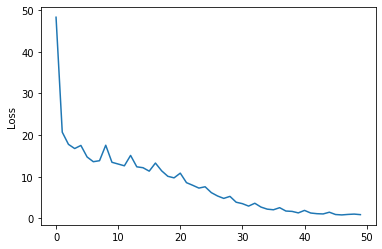

In [42]:
import matplotlib.pyplot as plt

#print("Summary updated loss:", summary_update_loss[:])
#print("Updated loss: ", update_loss)

plt.plot(summary_update_loss[:])
plt.ylabel('Loss')
plt.show()

<h1>মডেল টেস্ট করে দেখি কি অবস্থা</h1>

In [0]:
def text_to_seq(text):
    '''Prepare the text for the model'''
    
    text = clean_text(text, remove_stopwords=True)
    return [vocab_to_int.get(word, vocab_to_int['<UNK>']) for word in text.split()]


In [0]:
count=35
sum_F=12.346860213552002
avg_F=0.3527674346729143


In [0]:
import time

In [46]:
count=count-1
print(count)

34


In [110]:
count=count+1


##Create your own review or use one from the dataset
#input_sentence = "The packaging and everything was intact, but the yeast I got expired on 12/16.. Not sure if this is still good to use?"
#text = text_to_seq(input_sentence)

##Comment the following 3 lines if using custom Summary and text
#random = np.random.randint(0,len(clean_texts)) #len(clean_texts))
random=8
input_sentence = clean_texts[random]
text = text_to_seq(input_sentence)

#print("Cleaned Text: \n", text)

checkpoint = "./best_model.ckpt"

start_time=time.time()

loaded_graph = tf.Graph()
with tf.Session(graph=loaded_graph) as sess:
    ## Load saved model
    loader = tf.train.import_meta_graph(checkpoint + '.meta')
    loader.restore(sess, checkpoint)

    input_data = loaded_graph.get_tensor_by_name('input:0')
    logits = loaded_graph.get_tensor_by_name('predictions:0')
    text_length = loaded_graph.get_tensor_by_name('text_length:0')
    summary_length = loaded_graph.get_tensor_by_name('summary_length:0')
    keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
    
##Multiply by batch_size to match the model's input parameters
    answer_logits = sess.run(logits, {input_data: [text]*batch_size, 
                                      summary_length: [np.random.randint(5,8)], 
                                      text_length: [len(text)]*batch_size,
                                      keep_prob: 1.0})[0] 

## Remove the padding from the summary
pad = vocab_to_int["<PAD>"] 

elapsed_time=time.time()-start_time

##for custom summary and text, comment this line.
print("Index Value: ",random)

##for custom summary and text use "input_sequence" as parameter insted of "reviews.Text.loc[random]"

print('Raw Title: ', reviews.Titles.loc[random]) #raw_titles
print('\nRaw Text:\n', reviews.Texts.loc[random]) #input_sentence)

#writing original title to raw_title.txt
ogSum=reviews.Titles.loc[random]
ogFile=open("/content/drive/My Drive/ah/bengali_w2v/original.txt",'w')
ogFile.write(reviews.Titles.loc[random])
print("File Written to raw_title.txt")
ogFile.close()

print('\nCleaned Text Details:')
print('Word Ids:    {}'.format([i for i in text]))
print('Words:       {}'.format(" ".join([int_to_vocab[i] for i in text])))

print('\nHeadline Details:')
print('Word Ids:       {}'.format([i for i in answer_logits if i != pad]))

predSum=" ".join([int_to_vocab[i] for i in answer_logits if i != pad])
print("Generated Headline: ",predSum)
print("Time: ", elapsed_time)

#writing predicted title to generated_title.txt
predFile=open("/content/drive/My Drive/ah/bengali_w2v/generated.txt",'w')
predFile.write(predSum)
print("File Written to generated_title.txt")
predFile.close()

INFO:tensorflow:Restoring parameters from ./best_model.ckpt
Index Value:  8
Raw Title:  কংগ্রেসের সঙ্গে জোট নয়, জানিয়ে দিলেন মায়াবতী

Raw Text:
 জোটের জন্য প্রস্তুত নয় কংগ্রেস। তাই জোট বাঁধার প্রশ্নই ওঠে না। প্রয়োজনে একাই লড়বে বহুজন সমাজ পার্টি (বিএসপি)। ঘোষণা দলনেত্রী মায়াবতীর। চলতি বছরের শেষে রাজস্থান ও মধ্যপ্রদেশে বিধানসভা নির্বাচন। তা নিয়েই নিজের সিদ্ধান্ত জানিয়ে দিলেন তিনি। বুধবার সাংবাদিক বৈঠক ডাকেন বিএসপি নেত্রী। দাবি মতো আসন সমঝোতা হয়নি বলে কংগ্রেসকে তুলোধনা করেন তিনি। বলেন, ‘‘পরিস্থিতি যাই হোক না কেন, রাজস্থান ও মধ্যপ্রদেশ নির্বাচনে কংগ্রেসের সঙ্গে জোট বাঁধার প্রশ্নই ওঠে না। কোনওমতেই তা সম্ভব নয়। কারণ সঠিক অর্থে জোট বলতে যা বোঝায়, তাতে বিন্দুমাত্র আগ্রহ নেই কংগ্রেসের। জোটের জন্য একেবারেই ওরা প্রস্তুত নয়। এখন তো মনে হচ্ছে, বিজেপিকে আদৌ হারাতে চায় না। বরং বন্ধু দলগুলির ক্ষতি করতে চায়।বরাবর এমন আচরণ ওদের।যে কারণে কর্নাটক ও ছত্তীসগঢ়ে আমরা আঞ্চলিক দলগুলির হাত ধরতে বাধ্য হয়েছিলাম। রাজস্থান ও মধ্যপ্রদেশেও সেই মতোই এগোব। প্রয়োজনে একাই লড়ব আমরা। তবে কংগ্রেসের সঙ্গে হাত মেলাব না।’’ ত

In [48]:
pip install pyrough

ERROR: Could not find a version that satisfies the requirement pyrough (from versions: none)
ERROR: No matching distribution found for pyrough


<h1>Evaluation using ROUGE Scores</h1>
Following code is from https://stackoverflow.com/questions/47045436/h

The following code is for calculating ROUGE Score

In [0]:
from __future__ import division
from itertools import chain


def get_unigram_count(tokens):
    count_dict = dict()
    for t in tokens:
        if t in count_dict:
            count_dict[t] += 1
        else:
            count_dict[t] = 1

    return count_dict


class Rouge:
    beta = 1

    @staticmethod
    def my_lcs_grid(x, y):
        n = len(x)
        m = len(y)

        table = [[0 for i in range(m + 1)] for j in range(n + 1)]

        for j in range(m + 1):
            for i in range(n + 1):
                if i == 0 or j == 0:
                    cell = (0, 'e')
                elif x[i - 1] == y[j - 1]:
                    cell = (table[i - 1][j - 1][0] + 1, '\\')
                else:
                    over = table[i - 1][j][0]
                    left = table[i][j - 1][0]

                    if left < over:
                        cell = (over, '^')
                    else:
                        cell = (left, '<')

                table[i][j] = cell

        return table

    @staticmethod
    def my_lcs(x, y, mask_x):
        table = Rouge.my_lcs_grid(x, y)
        i = len(x)
        j = len(y)

        while i > 0 and j > 0:
            move = table[i][j][1]
            if move == '\\':
                mask_x[i - 1] = 1
                i -= 1
                j -= 1
            elif move == '^':
                i -= 1
            elif move == '<':
                j -= 1

        return mask_x

    @staticmethod
    def rouge_l(cand_sents, ref_sents):
        lcs_scores = 0.0
        cand_unigrams = get_unigram_count(chain(*cand_sents))
        ref_unigrams = get_unigram_count(chain(*ref_sents))
        for cand_sent in cand_sents:
            cand_token_mask = [0 for t in cand_sent]
            cand_len = len(cand_sent)
            for ref_sent in ref_sents:
                # aligns = []
                # Rouge.lcs(ref_sent, cand_sent, aligns)
                Rouge.my_lcs(cand_sent, ref_sent, cand_token_mask)

                # for i in aligns:
                #     ref_token_mask[i] = 1
            # lcs = []
            cur_lcs_score = 0.0
            for i in range(cand_len):
                if cand_token_mask[i]:
                    token = cand_sent[i]
                    if cand_unigrams[token] > 0 and ref_unigrams[token] > 0:
                        cand_unigrams[token] -= 1
                        ref_unigrams[token] -= 1
                        cur_lcs_score += 1

                        # lcs.append(token)

            # print ' '.join(lcs)

            lcs_scores += cur_lcs_score

        # print "lcs_scores: %d" % lcs_scores
        ref_words_count = sum(len(s) for s in ref_sents)
        # print "ref_words_count: %d" % ref_words_count
        cand_words_count = sum(len(s) for s in cand_sents)
        # print "cand_words_count: %d" % cand_words_count

        precision = lcs_scores / cand_words_count
        recall = lcs_scores / ref_words_count
        f_score = (1 + Rouge.beta ** 2) * precision * recall / (recall +
                                                                Rouge.beta ** 2 * precision + 1e-7) + 1e-6  # prevent underflow
        return precision, recall, f_score

    # @staticmethod
    # def rouge_2(cand_sents, ref_sents):
    #     cand_bigram_counts = get_bigram_counts(cand_sents)
    #     ref_bigram_counts = get_bigram_counts(ref_sents)




if __name__ == '__main__':
    r = Rouge()
    #A simple eample of how rouge can be calculated
    print(r.rouge_l([[1, 7, 6, 7, 5], [0, 2, 8, 3, 5]],
                    [[1, 2, 3, 4, 5], [3, 9, 5]]))

    #A more practical example of how it can be used for summary evaluation
    system_generated_summary = " The Kyrgyz President pushed through the law requiring the use of ink during the upcoming Parliamentary and Presidential elections In an effort to live up to its reputation in the 1990s as an island of democracy. The use of ink is one part of a general effort to show commitment towards more open elections. improper use of this type of ink can cause additional problems as the elections in Afghanistan showed. The use of ink and readers by itself is not a panacea for election ills."
    manual_summmary = " The use of invisible ink and ultraviolet readers in the elections of the Kyrgyz Republic which is a small, mountainous state of the former Soviet republic, causing both worries and guarded optimism among different sectors of the population. Though the actual technology behind the ink is not complicated, the presence of ultraviolet light (of the kind used to verify money) causes the ink to glow with a neon yellow light. But, this use of the new technology has caused a lot of problems. "

    print(r.rouge_l([system_generated_summary], [manual_summmary]))

In [50]:
r = Rouge()

system_generated_summary = ogSum
manual_summmary = predSum

[precision, recall, f_score] = r.rouge_l([system_generated_summary], [manual_summmary])

print("Precision is :"+str(precision)+"\nRecall is :"+str(recall)+"\nF Score is :"+str(f_score))

sum_F=sum_F+f_score
avg_F=sum_F/count

print("Sum of ROUGE Score: ",sum_F)
print("Average ROUGE Score = ", avg_F)

print("Count: ",count)

Precision is :0.627906976744186
Recall is :0.84375
F Score is :0.7200009510755588
Sum of ROUGE Score:  13.06686116462756
Average ROUGE Score =  0.3733388904179303
Count:  35
